## Análisis exploratorio preliminar

Dataset con **20780** entradas y **56 campos** de los cuales 14 están marcados como "deprecated" (a desestimar) en la documentación del proveedor de datos  https://covidtracking.com/data/api --> "Historic values for all states ".

En el caso de campos con muchos datos incompletos, se valorará el método para lidiar con ellos (eliminación filas, columnas, imputación etc) en caso necesario. El campo **dataQualityGrade** puede ser eliminado porque no contiene ningún valor.


In [22]:
# Definimos las columnas que queremos eliminar
columnas_eliminar = ['checkTimeEt', 'commercialScore', 'dateChecked', 'dateModified', 'grade', 'hash', 
                     'hospitalized', 'negativeIncrease', 'negativeRegularScore', 'negativeScore', 
                     'posNeg', 'positiveScore', 'score', 'total', 'dataQualityGrade']

# Creamos un nuevo dataframe que no incluya esas columnas (deprecated)
df1 = df.drop(columns=columnas_eliminar)

# Información sobre el dataset (tipo de datos, campos nulos o vacíos)

df1.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [23]:
# Análisis estadístico básico
df1.describe()

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
count,2.078000e+04,2.059200e+04,9271.000000,1.329000e+04,2138.000000,2.061400e+04,17339.000000,12382.000000,11636.000000,3789.000000,...,1094.000000,972.000000,999.000000,633.000000,3.421000e+03,2233.000000,20780.000000,20780.000000,20780.000000,20780.000000
mean,2.020244e+07,1.651560e+05,21729.123719,8.482246e+05,1659.862956,2.186936e+06,1190.576965,9262.762478,359.621176,1934.191607,...,20516.966179,188710.969136,168188.246246,25259.048973,3.089196e+05,31837.241379,1383.849519,17508.388210,24.790712,37.360780
std,3.608732e+03,3.267852e+05,45471.459778,1.344501e+06,4671.028548,4.436508e+06,2060.041207,12620.544081,594.831150,1953.329983,...,29267.559775,200218.073746,143748.073365,24139.253458,4.232854e+05,41929.658070,3023.558742,33586.022461,60.162742,208.237151
min,2.020011e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000,1.000000,3.000000,3.000000,1.000000e+00,0.000000,-7757.000000,-130545.000000,-201.000000,-12257.000000
25%,2.020060e+07,5.753750e+03,773.500000,5.394125e+04,43.000000,1.040498e+05,166.500000,985.250000,60.000000,501.000000,...,3155.500000,54874.000000,37675.500000,2682.000000,2.004700e+04,1085.000000,65.000000,1205.750000,0.000000,0.000000
50%,2.020090e+07,4.606450e+04,4491.000000,3.059720e+05,212.500000,6.552670e+05,531.000000,4472.000000,172.000000,1295.000000,...,11956.000000,100282.000000,144130.000000,17763.000000,1.233840e+05,13661.000000,435.000000,6125.000000,6.000000,0.000000
75%,2.020120e+07,1.779580e+05,19553.000000,1.056611e+06,1295.750000,2.264766e+06,1279.000000,12248.500000,380.000000,2451.000000,...,19059.000000,261121.000000,255251.000000,47012.000000,4.327270e+05,49010.000000,1335.250000,19086.500000,24.000000,36.000000
max,2.021031e+07,3.501394e+06,365961.000000,1.018694e+07,64400.000000,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,...,178979.000000,816231.000000,580372.000000,81803.000000,2.664340e+06,211546.000000,71734.000000,473076.000000,2559.000000,16373.000000


# Preparación de Columnas para Análisis

Las columnas fundamentales para el posterior análisis son las siguientes:

**date** : tiene valores en todos los campos. El tipo de dato es "float" por lo que procedemos a cambiarlo por "datetime" que es más apropiado

**state** : tiene valores en todos los campos por lo que ya está lista para operar

**death** : como hemos visto anteriormente, presenta 850 valores nulos. En este caso sería conveniente entender la naturaleza de los mismos para discernir si es conveniente sustituirlos por 0 para futuros cálculos o no.

In [24]:
# asignamos datetime a la variable date (actualmente float)
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,NaN,NaN,NaN,NaN,02,0,0,0,0
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,NaN,NaN,NaN,NaN,01,408,2347,-1,0
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,481311.0,81803.0,NaN,NaN,05,165,3380,22,11
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60,0,0,0,0
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,NaN,NaN,NaN,NaN,04,1335,45110,5,44


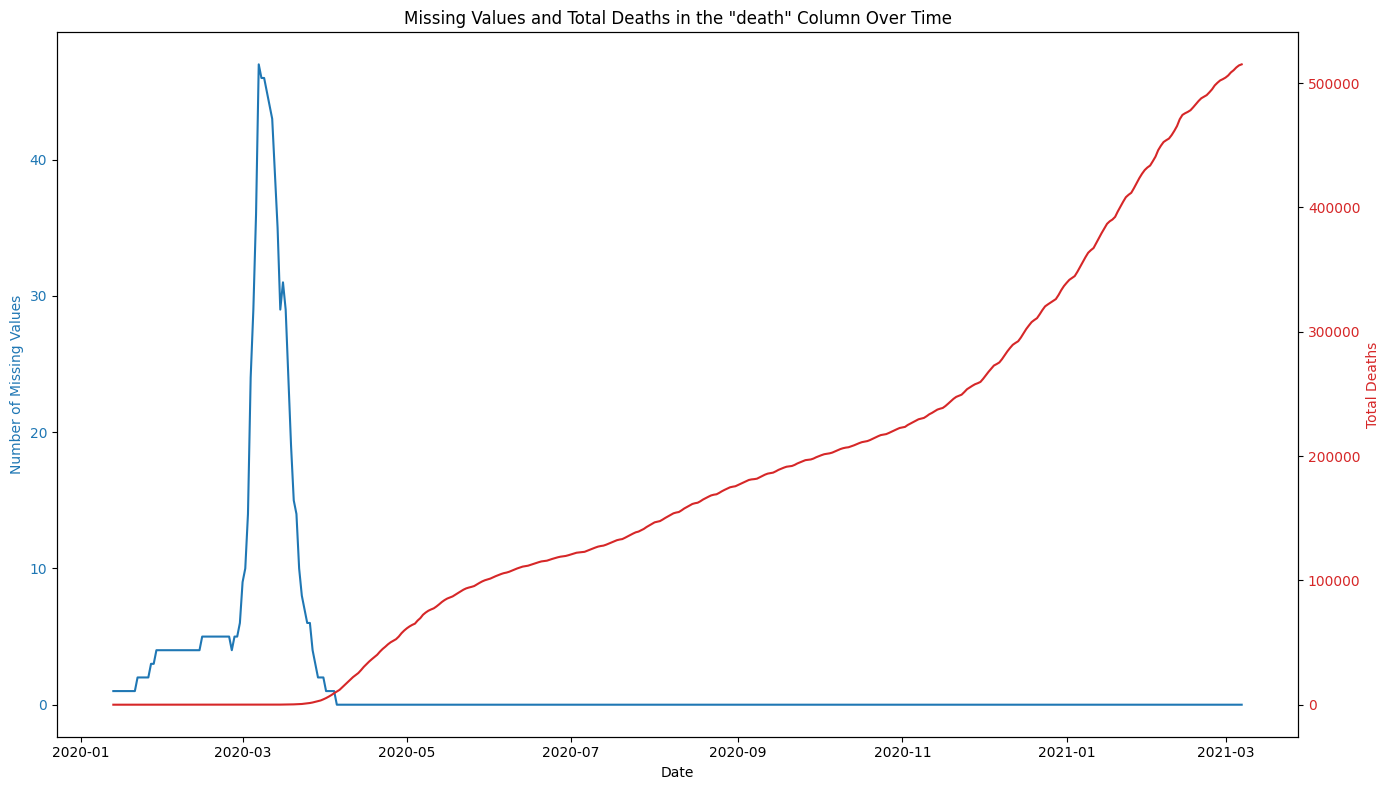

In [26]:
# Exploramos los valores "null" del campo "death" a lo largo del tiempo

# Muertes totales por fecha
total_death_by_date = df1.groupby('date')['death'].sum()

# valores nulos en el campo death por fecha
missing_death_by_date = df1['death'].isnull().groupby(df1['date']).sum()

# Create a secondary y-axis for the total deaths
fig, ax1 = plt.subplots(figsize=(14,8))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Missing Values', color=color)
ax1.plot(missing_death_by_date, color=color)  # Change 'missing_death_all_dates' to 'missing_death_by_date'
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(total_death_by_date, color=color)  # Change 'total_death_by_date' to total_death_by_date
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Missing Values and Total Deaths in the "death" Column Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



Al analizar la gráfica, se puede apreciar que los valores nulos correspondientes al campo "death" (representados por la línea azul) se encuentran concentrados en un período previo al inicio del registro de las primeras muertes en Estados Unidos (representadas por la línea roja). Por consiguiente, podemos inferir que durante este periodo anterior a abril de 2020, es factible reemplazar los valores vacíos por cero, con el objetivo de agilizar un análisis posterior.

In [ ]:
# SE convierten los valores nulos a 0

df["death"] = df["death"].fillna(0)